IMPORTING THE NECESSARY LIB

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

LOADING THE DATASET

In [2]:
df= pd.read_csv('C:/Users/AKWA/Downloads/IRIS.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#To display statistics about the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


CHECKING FOR THE DIFFERNT TYPES OF  CLASSIFICATION IN OUR DATASET

In [6]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

PREPROCESSING THE DATASET 

In [7]:
#Checking for missing values in the dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

DATA VISUALIZATION 

<AxesSubplot:>

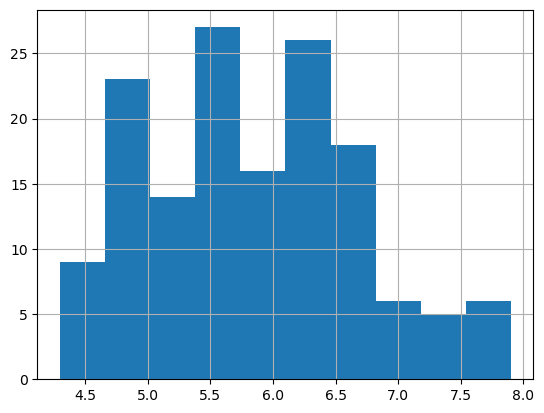

In [8]:
#Data visualization using histogram
df['sepal_length'].hist()

<AxesSubplot:>

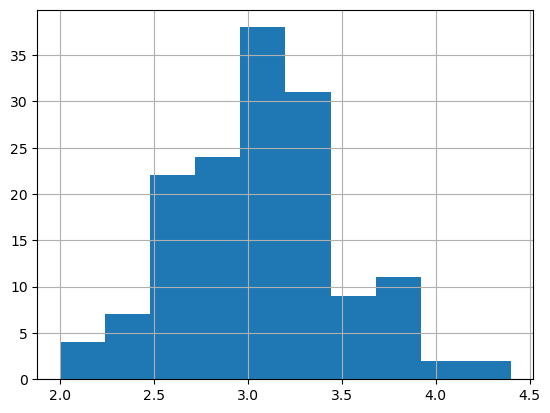

In [9]:
df['sepal_width'].hist()

<AxesSubplot:>

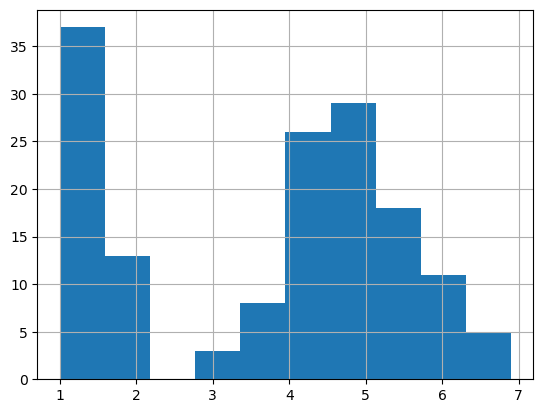

In [10]:
df['petal_length'].hist()

<AxesSubplot:>

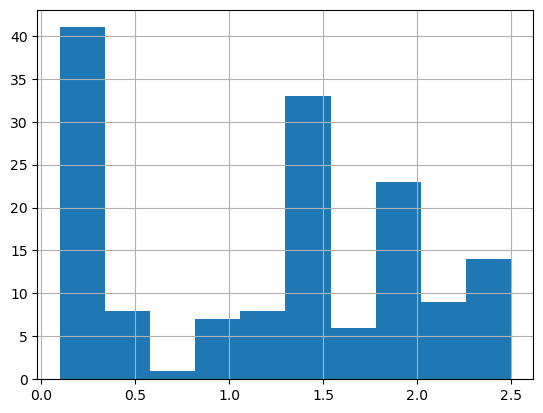

In [11]:
df['petal_width'].hist()

In [12]:
#Data visualization using scatter plot

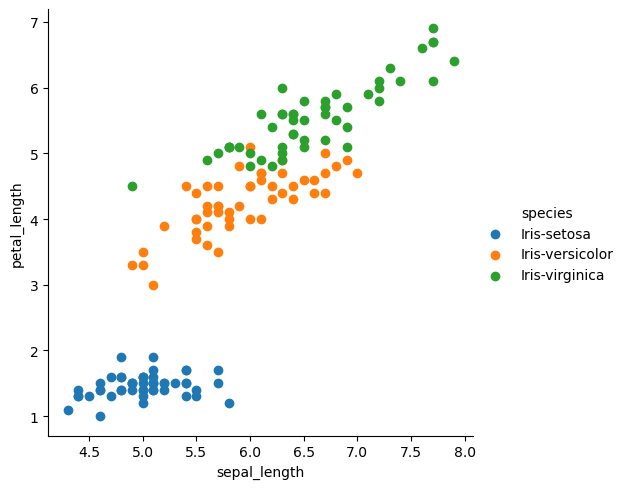

In [13]:
 sns.FacetGrid(df,hue='species',height=5).map(plt.scatter,'sepal_length','petal_length').add_legend()

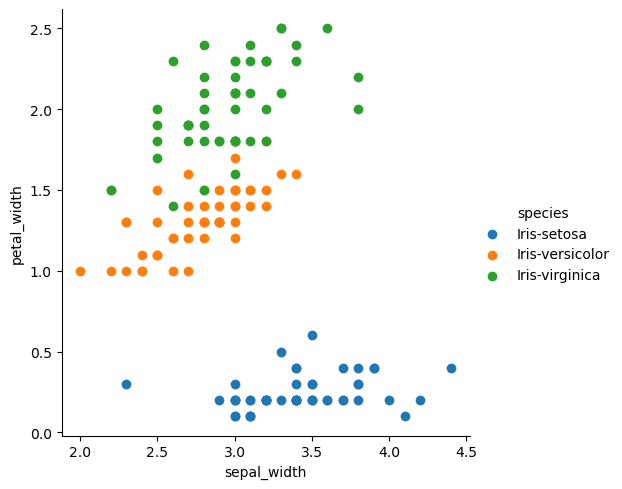

In [14]:
sns.FacetGrid(df,hue='species',height=5).map(plt.scatter,'sepal_width','petal_width').add_legend()

# converting categorical data to numerical data


In [15]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le = LabelEncoder()
df_iris = df

In [16]:
df_iris['species'] = le.fit_transform(df_iris['species'])
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# The species have now been converted to numerical dataset,
Iris-setosa        0.
Iris-versicolor    1.
Iris-virginica     2

In [17]:
df_iris['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

MODEL TRAINING 

In [18]:
X = df_iris.drop('species',axis =1) 
Y = df_iris['species']

In [19]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
### train_test_split

from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 

In [22]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [23]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [24]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()


In [25]:
#model training 
logReg.fit(X_train, Y_train)

LogisticRegression()

In [26]:
logReg.score(X_train, Y_train).round(2)

0.96

In [27]:
pred = logReg.predict(X_test)
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
accuracy = accuracy_score(Y_test,pred) * 100
accuracy

100.0

In [30]:
print('Accuracy:',logReg.score(X_test, Y_test))

Accuracy: 1.0


In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [32]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [33]:
pred2 = rfc.predict(X_test)
pred2

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [34]:
accuracy_score(Y_test,pred2) * 100

98.0

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gbc = GradientBoostingClassifier()

In [37]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [38]:
pred3 = gbc.predict(X_test)

In [39]:
accuracy_score(Y_test,pred3) * 100

98.0

In [40]:
#prediction 
Actual = Y_test
predicted = pred

In [41]:
from sklearn import metrics
print(metrics.classification_report(Actual,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [42]:
print(metrics.confusion_matrix(Actual,predicted))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
